### Introduction About the Data :

**The dataset** The goal is to predict `Time_Taken_Min` of given Food_Delivery_Data (Regression Analysis).

There are 18 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `Time_Taken_Min`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [3]:
# for analysis of data importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
import missingno as msno

import warnings    
warnings.filterwarnings("ignore")

In [2]:
## Data Ingestions step
df=pd.read_csv("data/finalTrain.csv")


In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.shape

(45584, 20)

In [5]:
df.dtypes          # show data types of variables

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [6]:
df.nunique()   # show number of unique values in data

ID                             45584
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather_conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [8]:
df[df.duplicated()]        # show duplicate values

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)


In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop(["ID", "Delivery_person_ID"], axis = 1)

In [11]:
df.describe() 

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [12]:
df.describe(include = 'object')    # give statistical summary of categorica variables

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
count,45584,43853,45584,44968,44983,45584,45584,45356,44384
unique,44,176,193,6,4,4,4,2,3
top,15-03-2022,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1192,461,495,7653,15476,11530,26429,44460,34087


In [13]:
df.isnull().sum()

Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

<Axes: >

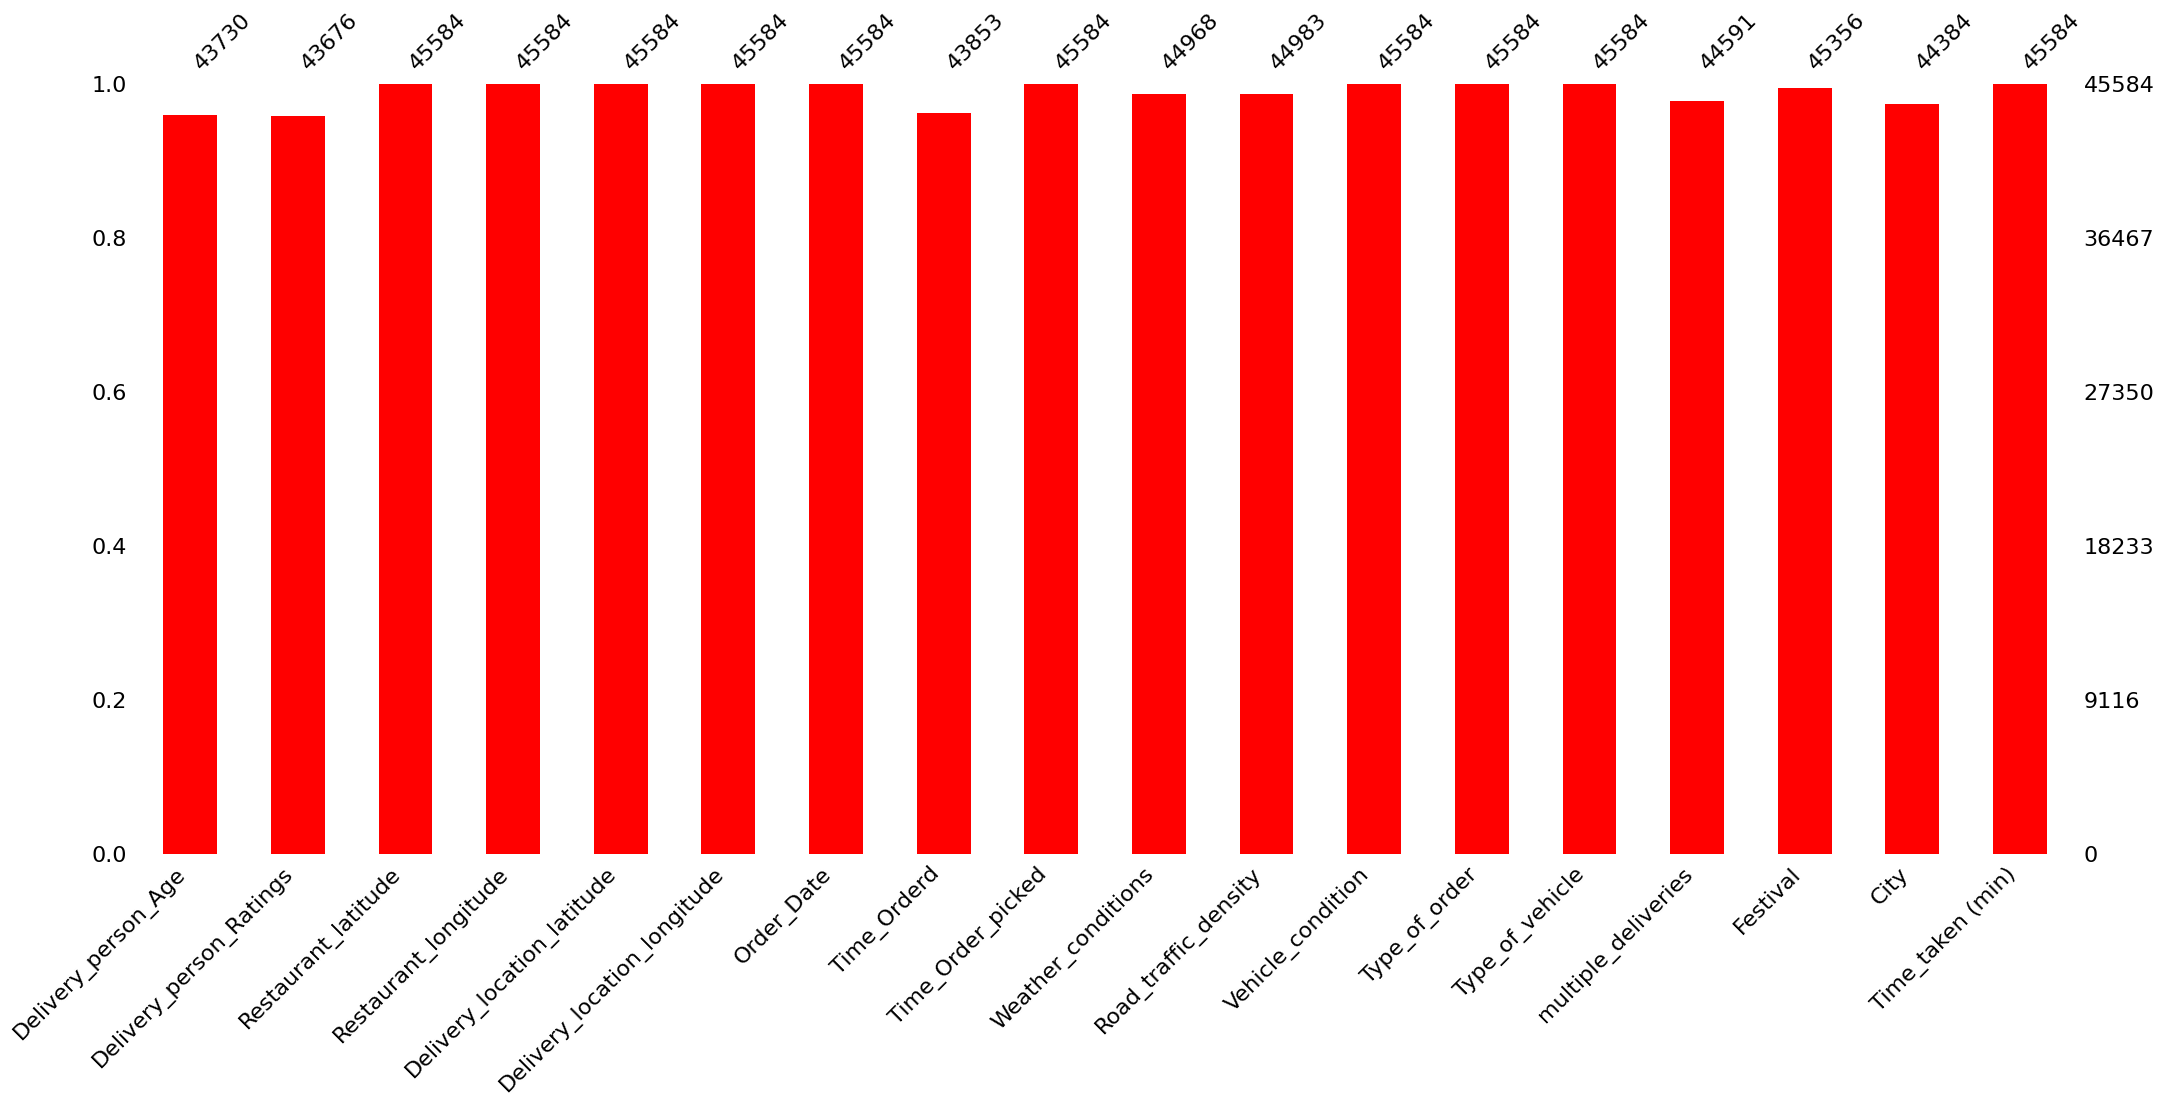

In [14]:
msno.bar(df , color = 'red')    # show missing values in the form of graph

In [15]:
cat = ['Festival', 'City','Road_traffic_density','Weather_conditions']

In [16]:
for i in cat:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [17]:
num = ['Delivery_person_Ratings','Delivery_person_Age']


In [18]:
for i in num:
    df[i].fillna(df[i].median(), inplace=True)

In [19]:
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])   # fill numerical variables using mean

* Mode imputation is suitable for categorical variables or numerical variables with a small number of unique values.

In [20]:
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

In [21]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [22]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25',
       '0.458333333', '19:15', '16:55', '11:40', '15:15', '22:55',
       '22:25', '20:55', '23:05', '0.75', '0.958333333', '09:40', '20:20',
       '22:35', '0.916666667', '23:55', '15:40', '10:30', '0.875',
       '10:50', '16:05', '20:15', '12:15', '15:45', '22:15', '10:45',
       '15:30', '24:05:00', '21:25', '12:45', '21:15', '18:20', '18:25',
       '11:50', '12:50', '10:55', '21:40', '10:20', '17:55', '23:50',
       '12:55', '24:10:00', '10:40', '0.375', '20:45', '0.833333333',
       '23:15', '22:20', '21:05', '0.708333333', '24:15:00', '21:20',
       '14:35', '10:25', '09:05', '16:50', '08:40', '23:40', '21:50',
       '19:55', '0.625', '1

* The number ‘0.458333333’ is a decimal representation of time. It is equivalent to 11:00. 
* The number ‘0.916666667’ is a decimal representation of time. It is equivalent to 22:00.
* The number ‘0.791666667’ is a decimal representation of time. It is equivalent to 19:00.
* The number ‘0.375’ is a decimal representation of time. It is equivalent to 09:00.

In [23]:
df['Time_Order_picked'] = df['Time_Order_picked'].replace({'0.458333333': '11:00', '0.75' : '18:00', '0.958333333' : '23:00', '0.916666667': '22:00', '0.875' : '21:00', '24:05:00': '00:05', '24:10:00' : '00:10', '0.375' :'09:00', '0.833333333' : '20:00' , '0.708333333': '17:00', '24:15:00': '00:15', '0.625': '15:00', '1': '00:00','0.791666667': '19:00', '0.5' : '12:00', '0.416666667': '10:00', '0.541666667': '13:00', '0.583333333': '14:00', '0.666666667': '16:00'})
df['Time_Orderd'] = df['Time_Orderd'].replace({'0.458333333': '11:00', '0.958333333' : '23:00', '0.791666667': '19:00', '0.875' : '21:00', '1': '00:00', '0.375' :'09:00', '0.625': '15:00', '0.833333333' : '20:00', '0.666666667': '16:00', '0.75' : '18:00', '0.416666667': '10:00', '0.916666667': '22:00', '0.5' : '12:00', '0.708333333': '17:00', '0.541666667': '13:00', '0.583333333': '14:00'})

In [24]:
df["Time_Orderd"] = df["Time_Orderd"].fillna(df["Time_Order_picked"])

In [25]:
df['Time_Orderd'].unique()

array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '11:00', '09:45', '08:40',
       '23:00', '17:25', '19:45', '19:10', '10:55', '21:40', '19:00',
       '16:45', '11:30', '15:10', '22:45', '22:10', '20:45', '22:50',
       '17:55', '09:25', '20:15', '22:25', '22:40', '23:50', '15:25',
       '10:20', '20:55', '10:40', '15:55', '20:10', '12:10', '15:30',
       '10:35', '21:10', '20:50', '12:35', '21:00', '23:40', '18:15',
       '18:20', '11:45', '12:45', '23:30', '10:50', '21:25', '10:10',
       '17:50', '22:20', '12:40', '23:55', '10:25', '08:45', '23:45',
       '19:55', '22:15', '23:10', '09:15', '18:25', '18:45', '16:50',
       '00:00', '14:20', '10:15', '08:50', '09:00', '17:45', '16:35',
       '08:30', '21:45', '19:40', '14:50', '18:10', '12:20', '12:50',
       '09:10', '12:

In [26]:
df['Time_Order_picked'].unique()

array(['22:10', '15:05', '17:40', '09:30', '20:05', '20:35', '15:10',
       '20:40', '20:50', '21:30', '20:25', '22:45', '08:30', '19:45',
       '12:30', '18:50', '23:30', '21:35', '23:45', '22:50', '22:40',
       '23:35', '13:40', '21:45', '19:10', '14:25', '11:10', '09:55',
       '08:55', '23:10', '17:30', '18:35', '19:50', '19:25', '11:00',
       '19:15', '16:55', '11:40', '15:15', '22:55', '22:25', '20:55',
       '23:05', '18:00', '23:00', '09:40', '20:20', '22:35', '22:00',
       '23:55', '15:40', '10:30', '21:00', '10:50', '16:05', '20:15',
       '12:15', '15:45', '22:15', '10:45', '15:30', '00:05', '21:25',
       '12:45', '21:15', '18:20', '18:25', '11:50', '12:50', '10:55',
       '21:40', '10:20', '17:55', '23:50', '12:55', '00:10', '10:40',
       '09:00', '20:45', '20:00', '23:15', '22:20', '21:05', '17:00',
       '00:15', '21:20', '14:35', '10:25', '09:05', '16:50', '08:40',
       '23:40', '21:50', '19:55', '15:00', '10:35', '09:25', '17:20',
       '19:30', '17:

In [27]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

<Axes: >

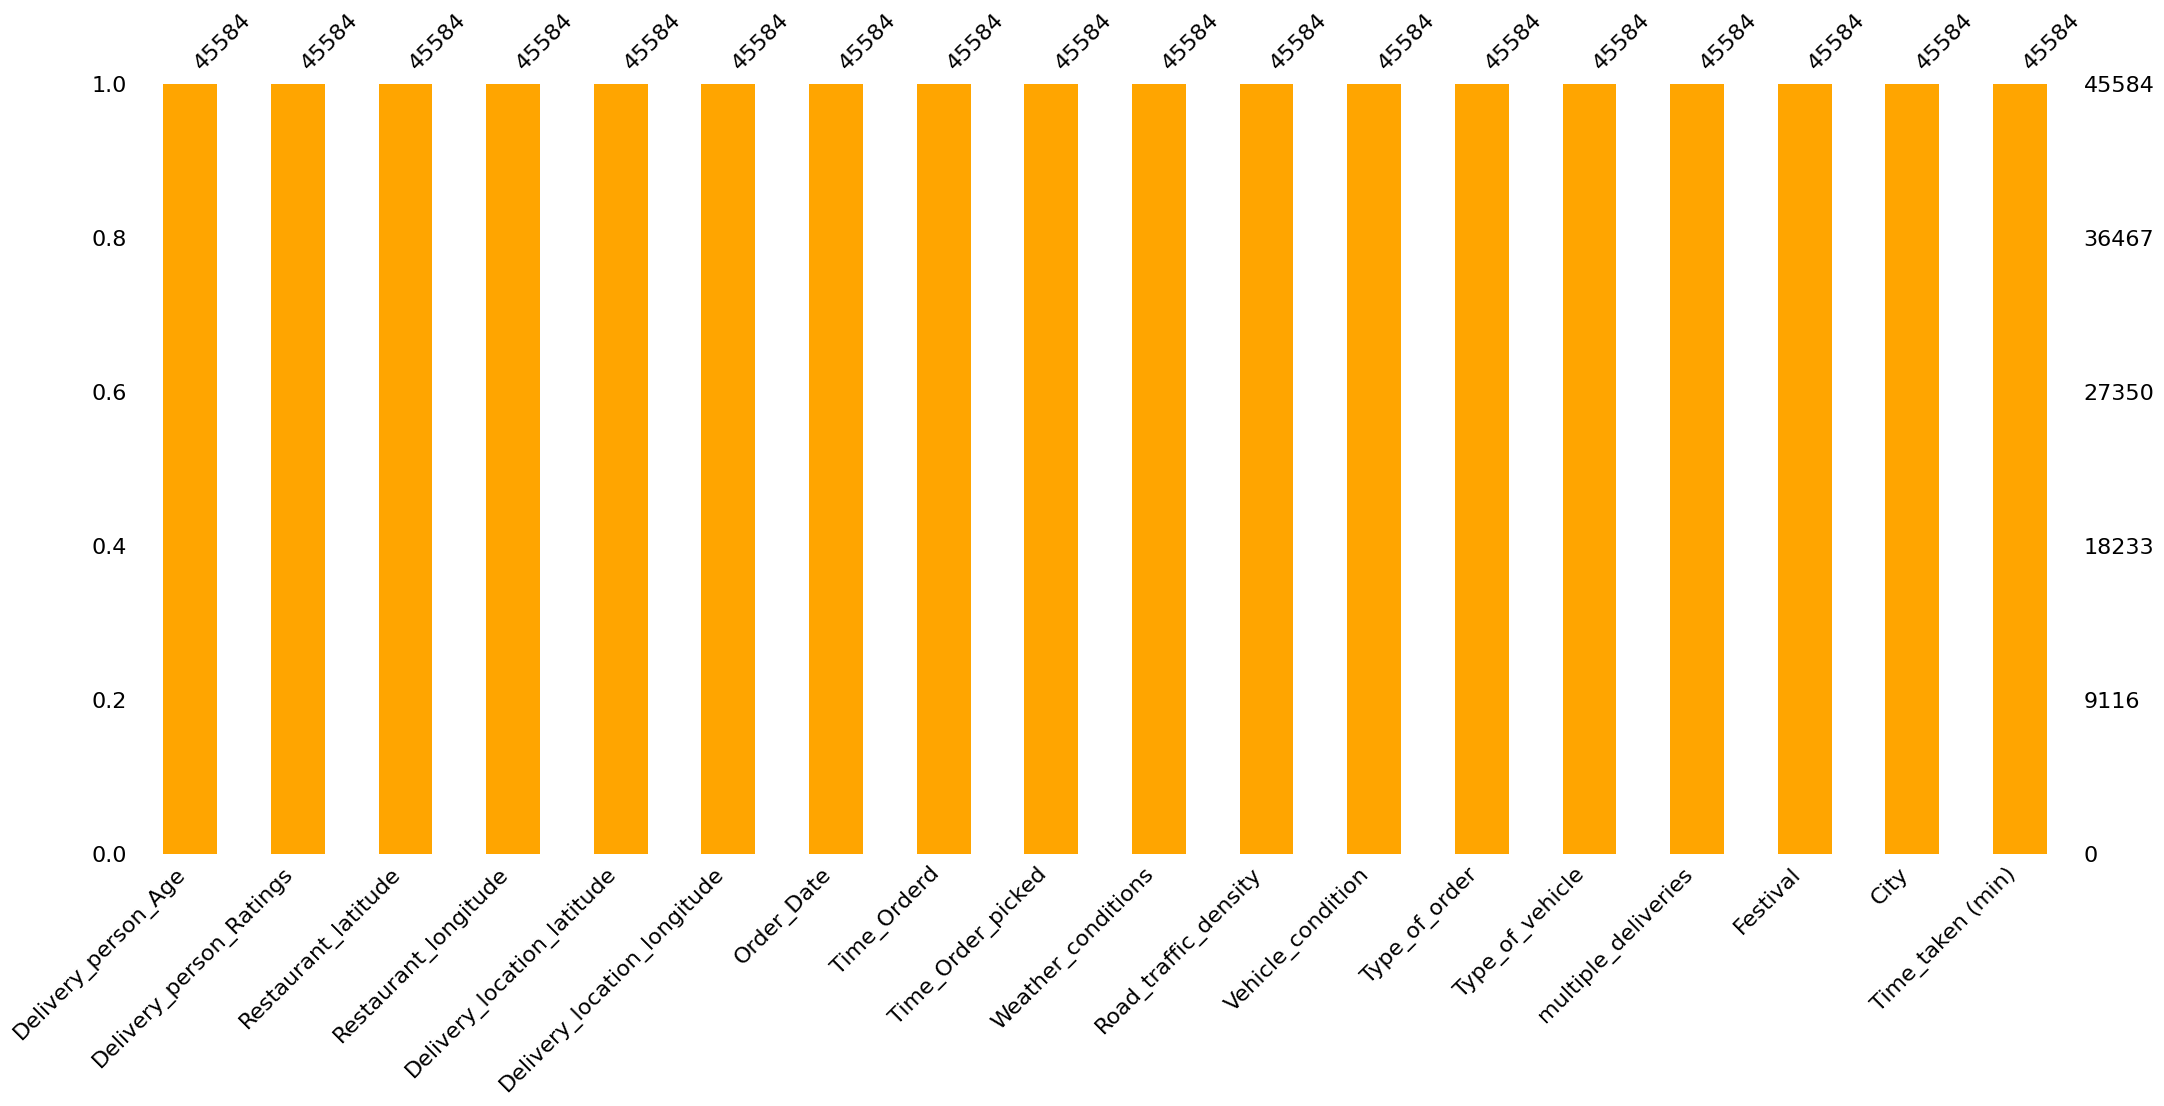

In [28]:
msno.bar(df , color = 'orange')    # show missing values in the form of graph

In [29]:
import geopy.distance

# Calculate distance between restaurants and delivery points by using coordinates
coord_features = ["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"]

def calculate_dist(la1,lo1,la2,lo2):
        return geopy.distance.geodesic((abs(la1),abs(lo1)), (abs(la2),abs(lo2))).km

df["distance"] = df[coord_features].apply(lambda x: calculate_dist(*x), axis=1)

In [30]:
df.drop(coord_features, axis=1, inplace=True)

In [31]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464
1,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376
2,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306
3,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795
4,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484


In [32]:
df['Order_datetime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Orderd'], format='%d-%m-%Y %H:%M')
df['picked_datetime'] = pd.to_datetime(df['Order_Date'] + ' ' + df['Time_Order_picked'], format='%d-%m-%Y %H:%M')

In [33]:
#calculating prep time
df['Prepn_Time'] = df['picked_datetime'] - df['Order_datetime']
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Order_datetime,picked_datetime,Prepn_Time
0,36.0,4.2,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,2022-02-12 21:55:00,2022-02-12 22:10:00,0 days 00:15:00
1,21.0,4.7,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,2022-02-13 14:55:00,2022-02-13 15:05:00,0 days 00:10:00
2,23.0,4.7,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,2022-03-04 17:30:00,2022-03-04 17:40:00,0 days 00:10:00
3,34.0,4.3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,2022-02-13 09:20:00,2022-02-13 09:30:00,0 days 00:10:00
4,24.0,4.7,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,2022-02-14 19:50:00,2022-02-14 20:05:00,0 days 00:15:00


In [34]:
df["Prepn_Time"] = df["Prepn_Time"].dt.components.minutes

In [35]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Delivery_person_Age,45584.0,29.584525,15.0,25.0,30.0,34.0,50.0,5.696221
Delivery_person_Ratings,45584.0,4.636546,1.0,4.6,4.7,4.8,6.0,0.327931
Vehicle_condition,45584.0,1.023385,0.0,0.0,1.0,2.0,3.0,0.839055
multiple_deliveries,45584.0,0.750197,0.0,0.0,1.0,1.0,3.0,0.567465
Time_taken (min),45584.0,26.293963,10.0,19.0,26.0,32.0,54.0,9.384298
distance,45584.0,9.718648,1.463837,4.65404,9.20384,13.660197,20.942906,5.598647
Order_datetime,45584,2022-03-14 10:25:14.123376640,2022-02-11 00:00:00,2022-03-04 23:00:00,2022-03-15 16:50:00,2022-03-27 18:15:00,2022-04-06 23:55:00,NaN
picked_datetime,45584,2022-03-14 10:08:35.634871808,2022-02-11 00:00:00,2022-03-04 23:00:00,2022-03-15 16:45:00,2022-03-27 18:06:15,2022-04-06 23:55:00,NaN
Prepn_Time,45584.0,9.609841,0.0,5.0,10.0,15.0,15.0,4.440571


In [36]:
df = df.drop(['Order_Date','Time_Orderd','Time_Order_picked','Order_datetime','picked_datetime'], axis =1)

In [37]:
df.head(3)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Prepn_Time
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,15
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,10
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,10


In [38]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'distance', 'Prepn_Time'],
      dtype='object')

In [39]:
nums = ['Delivery_person_Age','Time_taken (min)','distance','Delivery_person_Ratings']

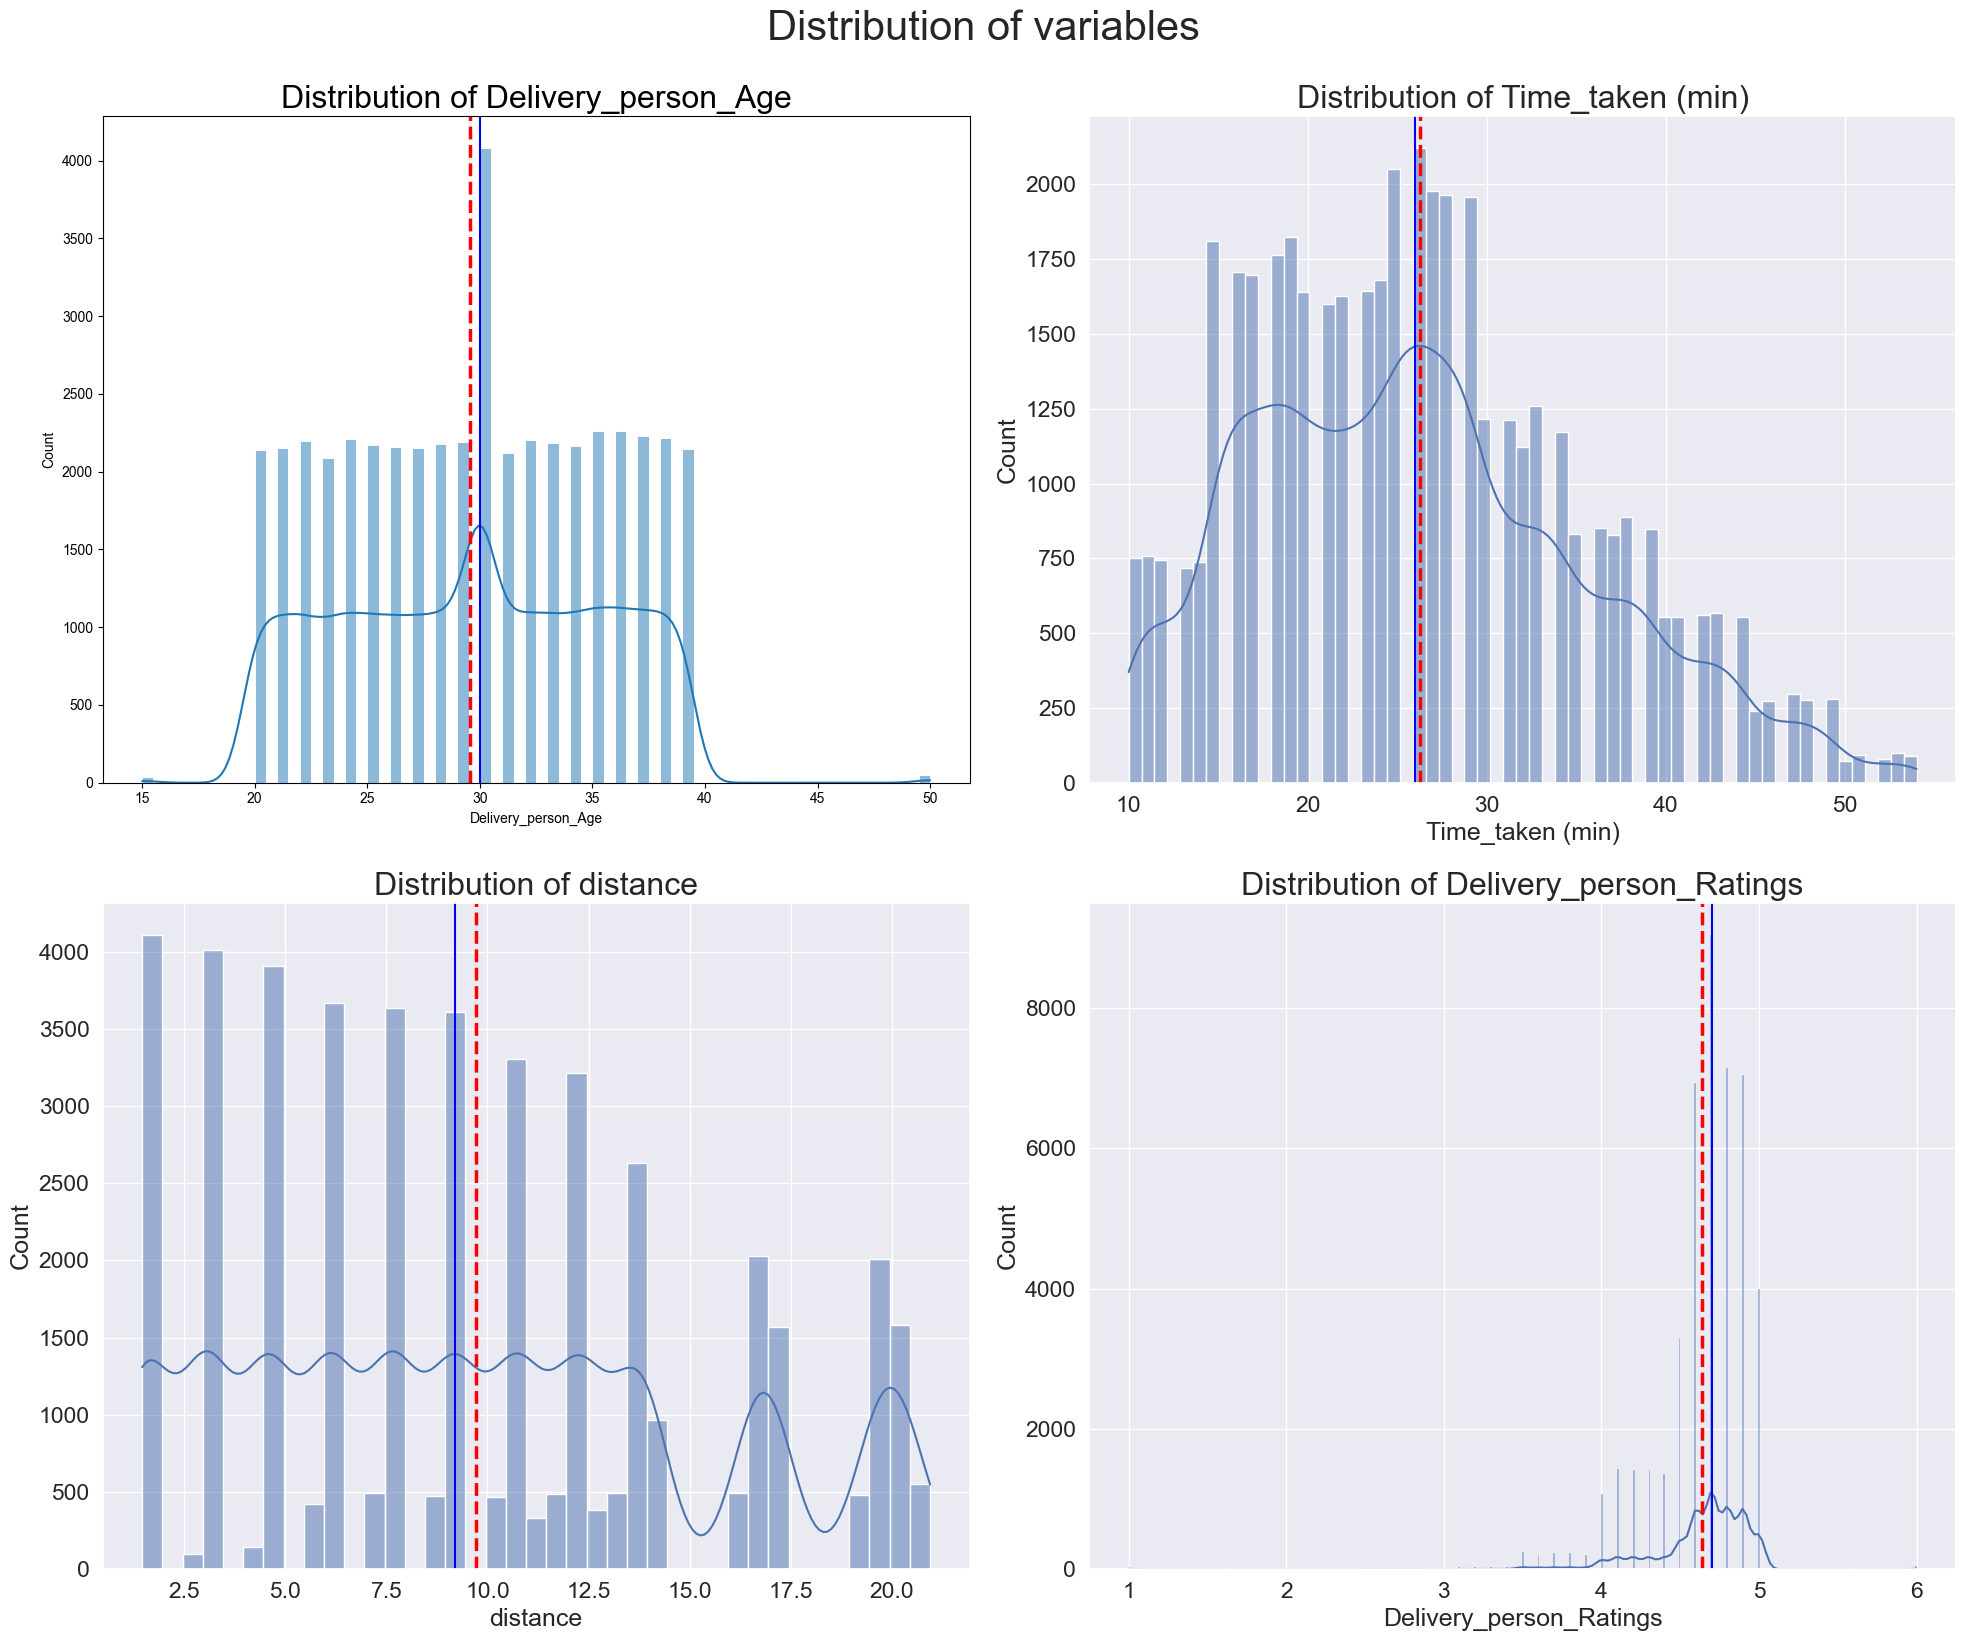

In [40]:
n=1
plt.subplots(figsize=(20, 16))     # subplots figure size
for i in nums:                    # use for loop for getting suplots
    plt.subplot(2,2,n)      # getting number  of subplots in rows and columns
    ax = plt.gca()       # get current axes
    sns.set(font_scale = 1.5)     # get scale of fonts
    sns.histplot(df[i],kde=True, palette='Set3')    # histoplot
    ax.set_title('Distribution of %s'%(i), fontsize=23)  # title of histoplot
    plt.axvline(x=df[i].mean(),ls='--',lw=2.5, color='red',label='mean')  # show mean in plot
    plt.axvline(x=df[i].median(), color='blue',label='medain')  # show median in plot
    n+=1 
    plt.tight_layout()   # figure tightness/compactness
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)  # title to whole subplot
plt.show()  # show plot

In [41]:
num1 = ['multiple_deliveries','Vehicle_condition','Prepn_Time'] 

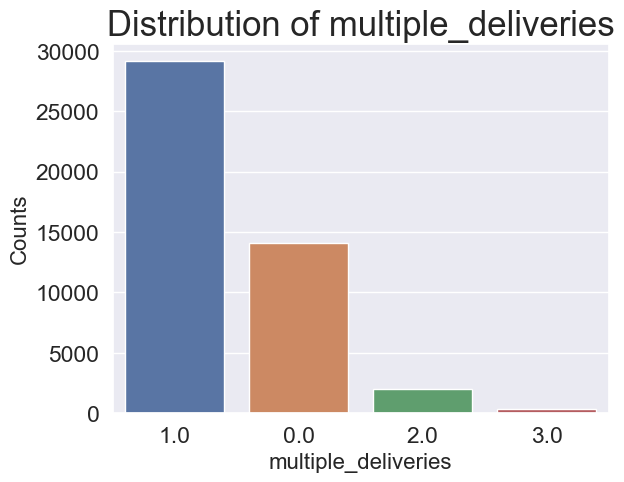

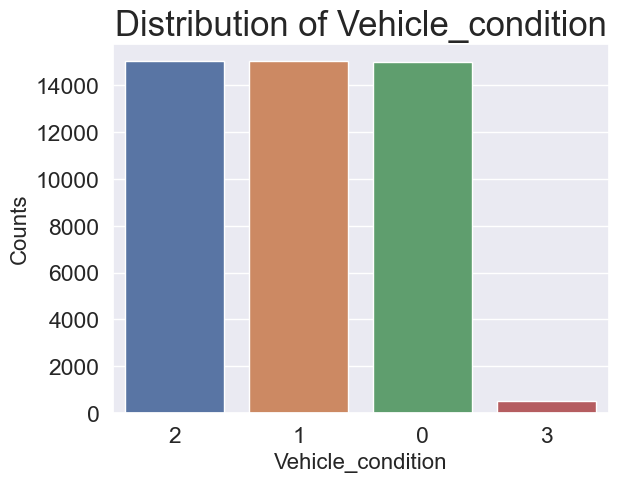

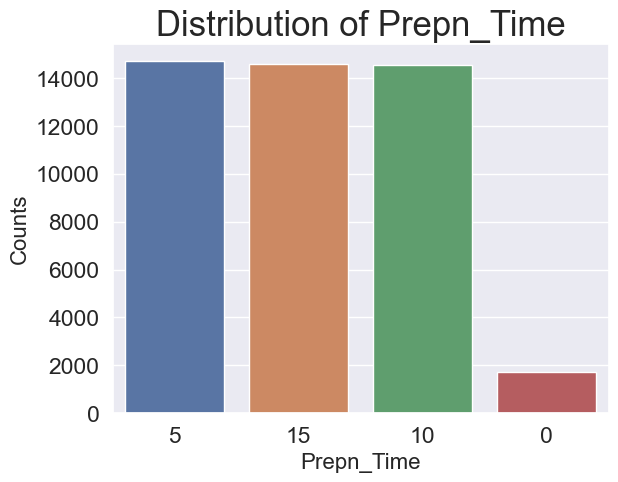

In [42]:
#Plotting countplot for analysing the distribution of categorical variables
for i in num1:   # get count plot  
    fig, ax = plt.subplots(1,1)  # fig size
    sns.countplot(x= df[i] , order = df[i].value_counts().index)  # countplot
    plt.title('Distribution of %s'%(i), fontsize=25)   # title
    plt.xlabel(i, fontsize=16)  # x label
    plt.ylabel('Counts', fontsize=16)  # label

In [43]:
cat = ['Festival', 'City','Road_traffic_density','Weather_conditions','Type_of_order','Type_of_vehicle']

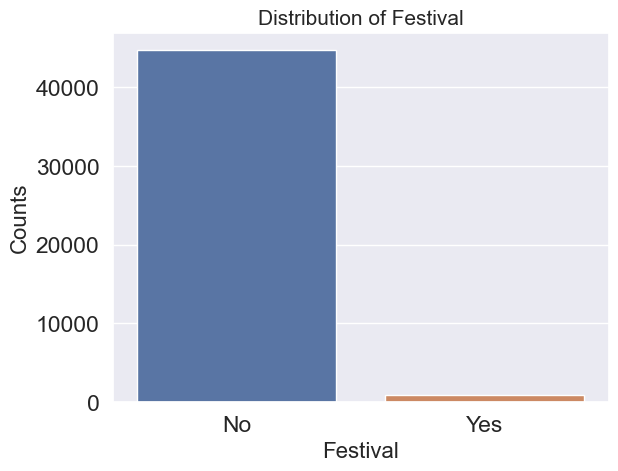

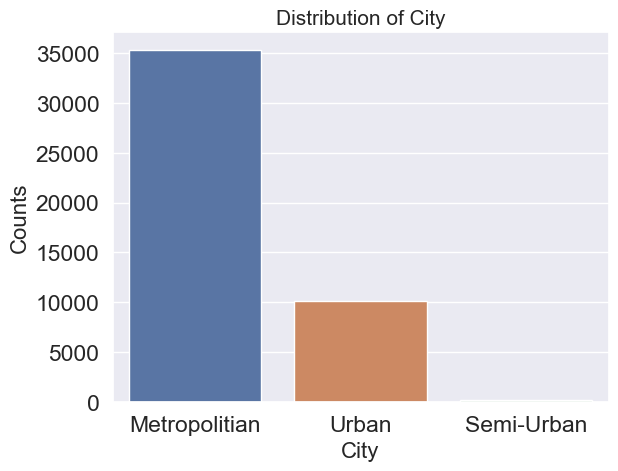

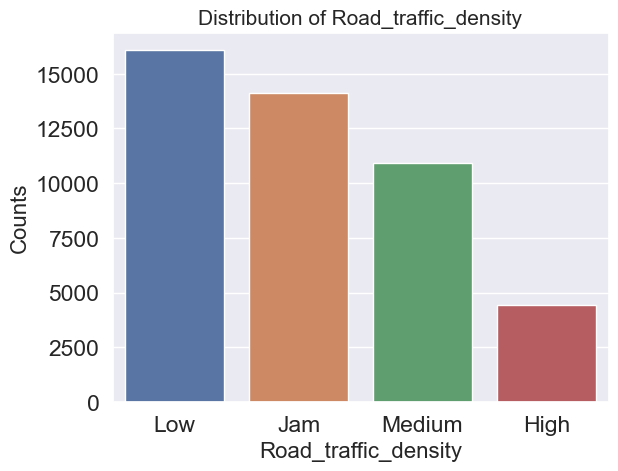

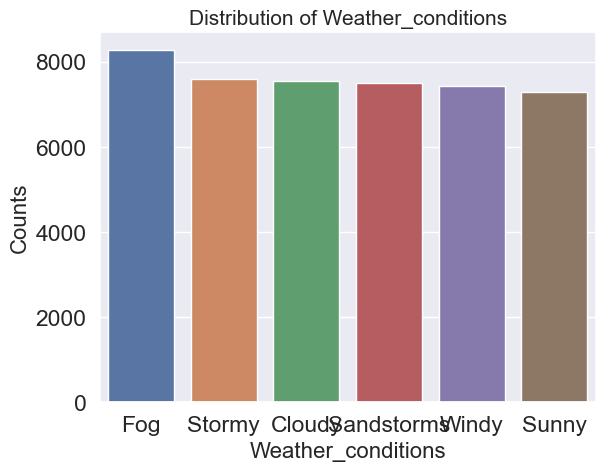

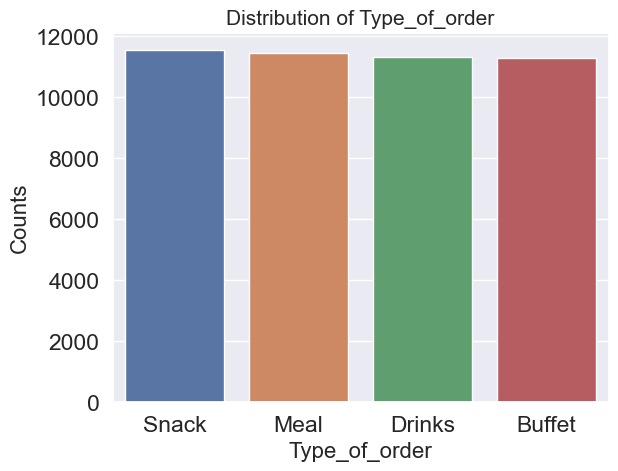

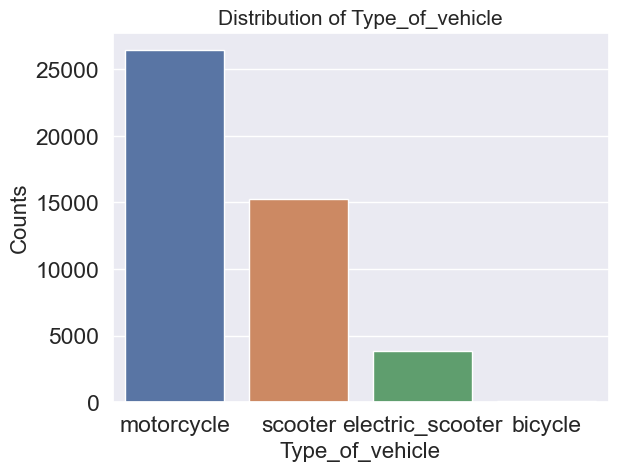

In [44]:
#Plotting countplot for analysing the distribution of categorical variables
for i in cat:   # get count plot  
    fig, ax = plt.subplots(1,1)  # fig size
    sns.countplot(x=df[i], order = df[i].value_counts().index)  # countplot
    plt.title('Distribution of %s'%(i), fontsize=15)   # title
    plt.xlabel(i, fontsize=16)  # x label
    plt.ylabel('Counts', fontsize=16)  # label

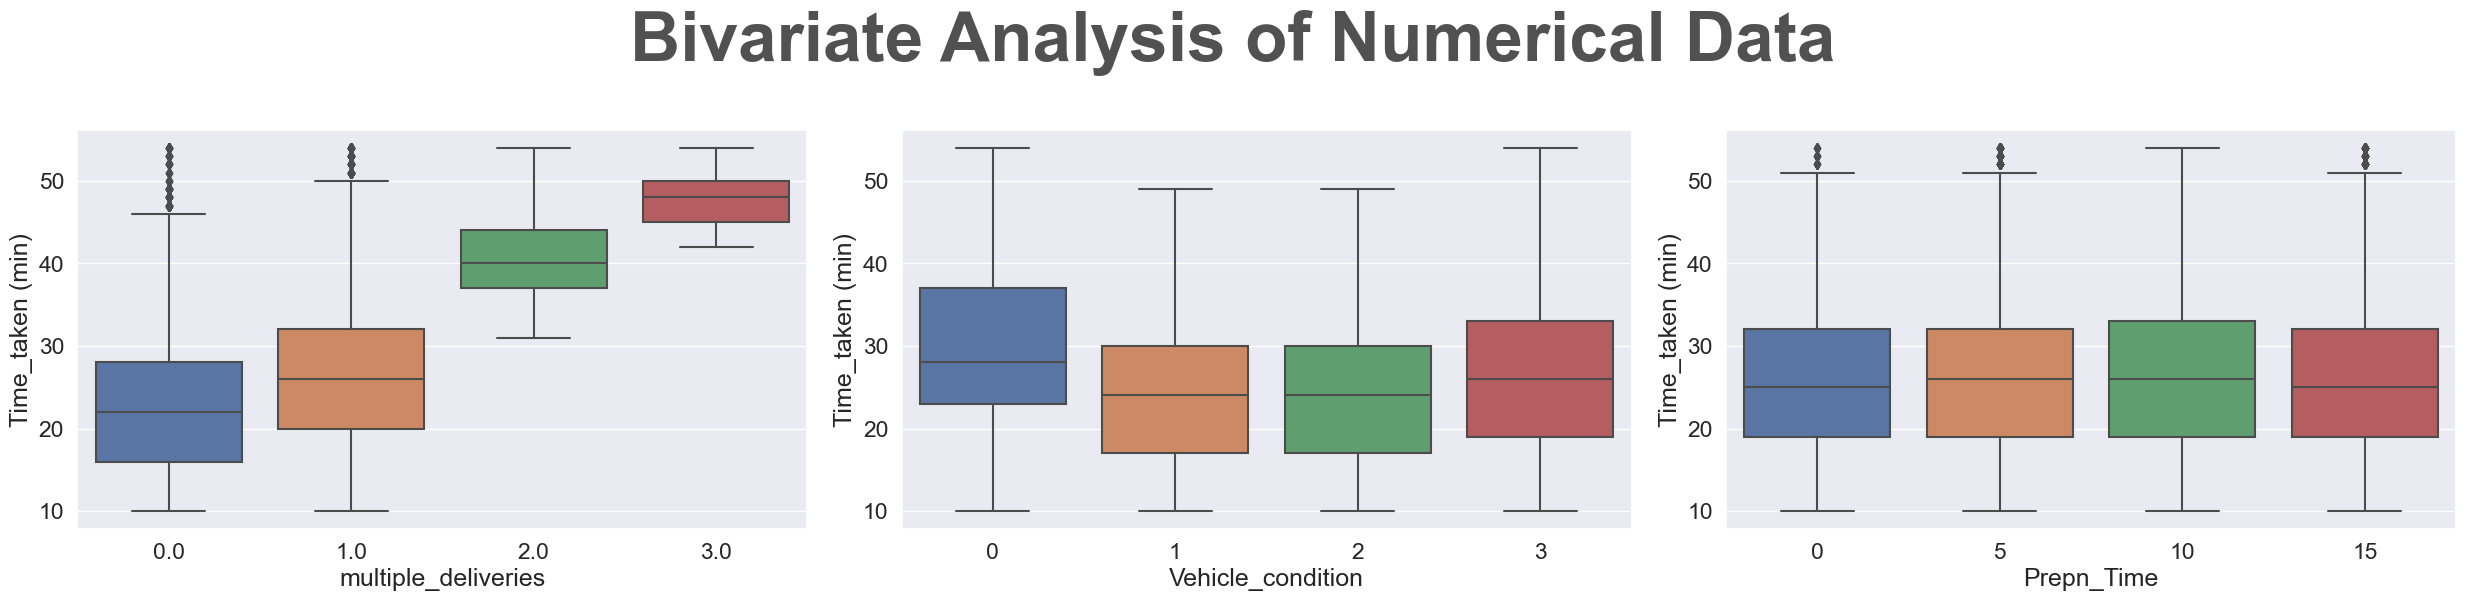

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
plt.suptitle("Bivariate Analysis of Numerical Data", fontsize = 50, fontweight = "bold", alpha = 0.8, y=1)
for i in range(0, len(num1)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = df[num1[i]], y='Time_taken (min)', data=df)
    plt.xlabel(num1[i])
    plt.tight_layout()

In [46]:
cat1 = ['Festival', 'City','Road_traffic_density','Weather_conditions','Type_of_order','Type_of_vehicle']

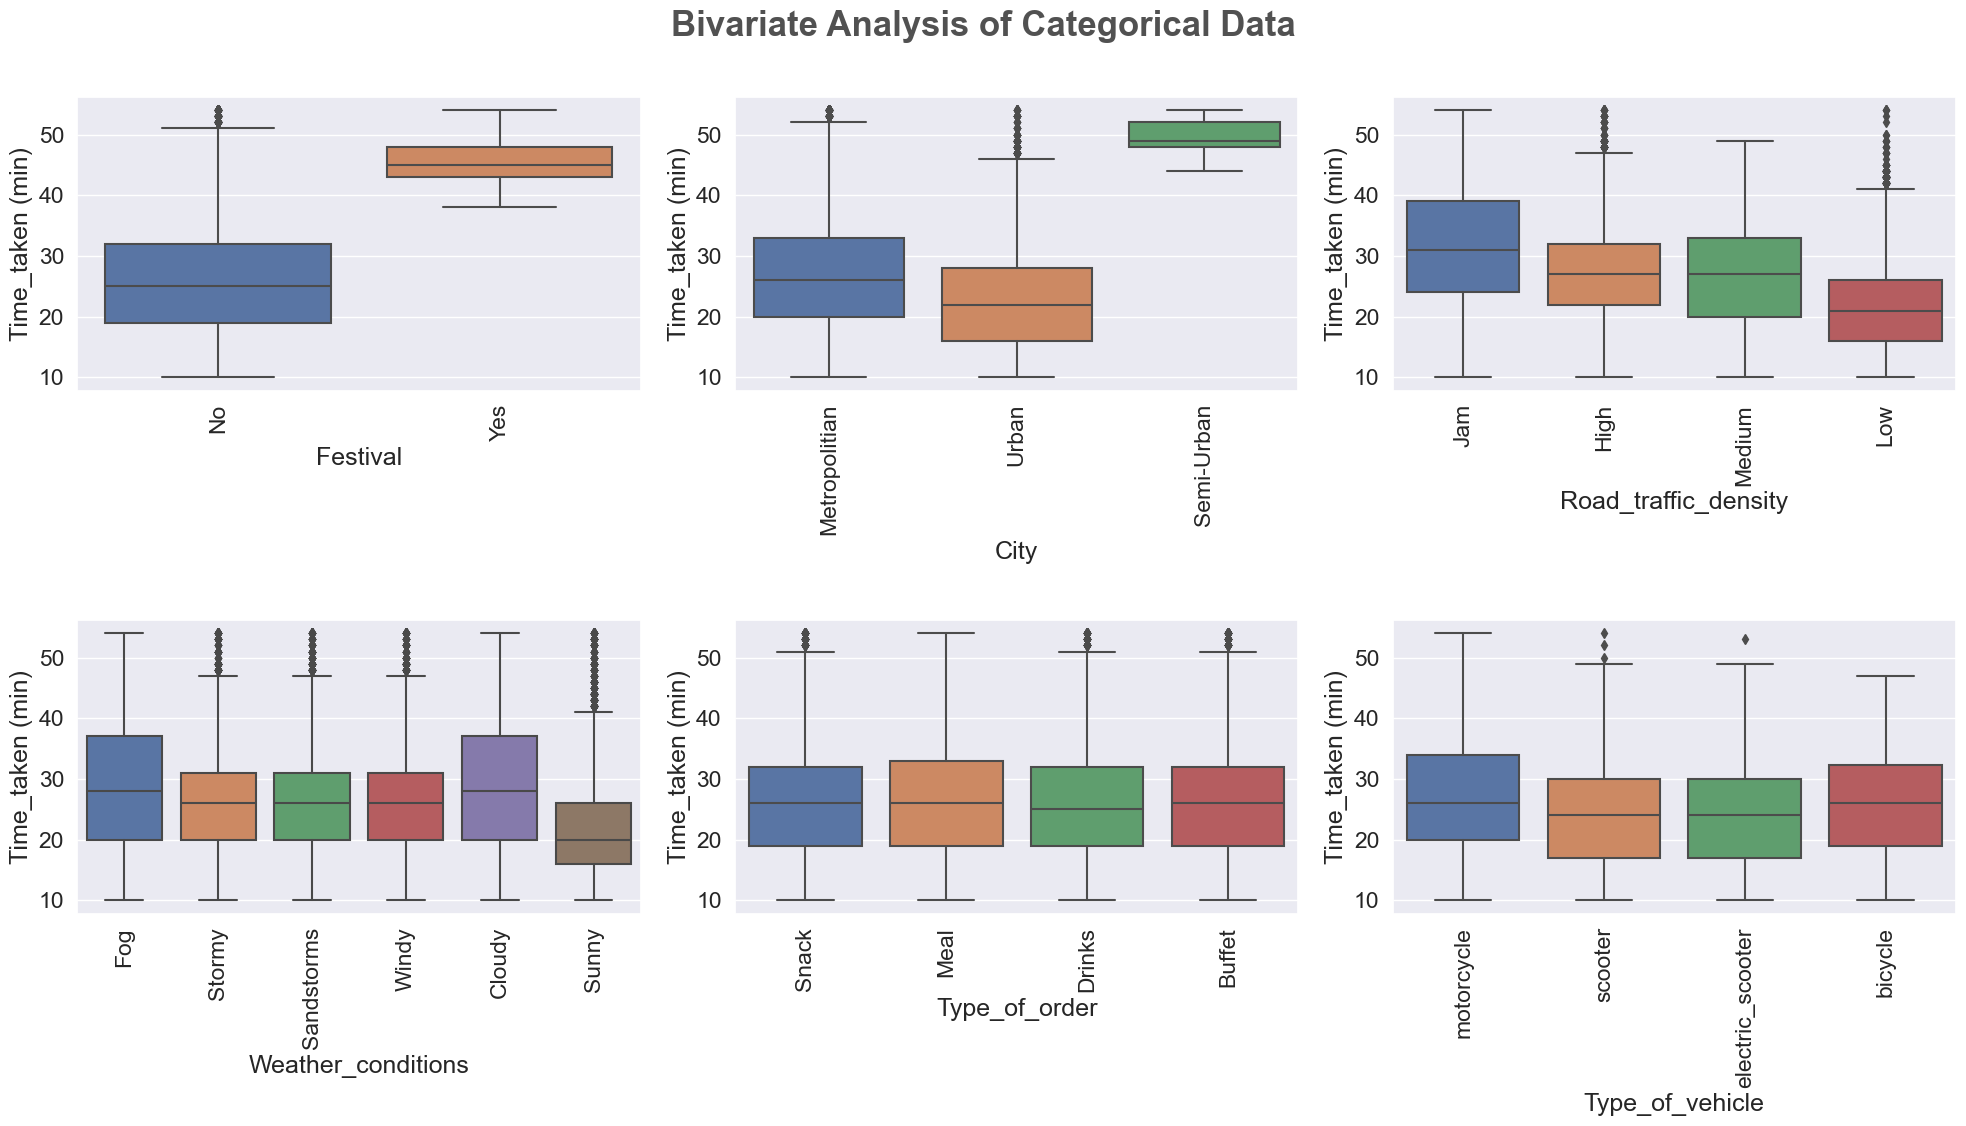

In [47]:
plt.figure(figsize=(20,25))
plt.suptitle("Bivariate Analysis of Categorical Data", fontsize = 25, fontweight = "bold", alpha = 0.8, y=1)

for i in range(0, len(cat1)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x = df[cat1[i]], y='Time_taken (min)', data=df)
    plt.xlabel(cat1[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()

<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken (min)'>

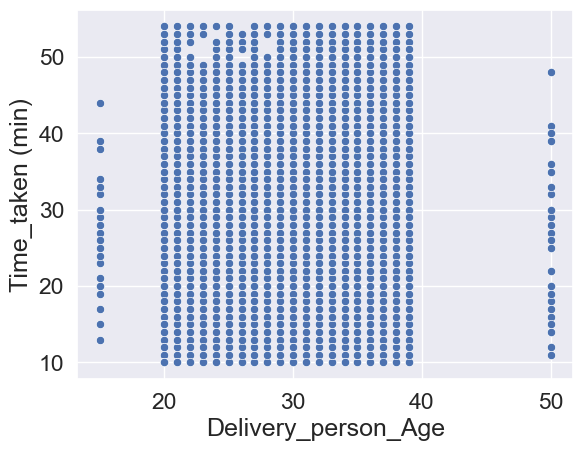

In [48]:
sns.scatterplot(data = df, x = df['Delivery_person_Age'], y = 'Time_taken (min)' )

<Axes: xlabel='Delivery_person_Ratings', ylabel='Time_taken (min)'>

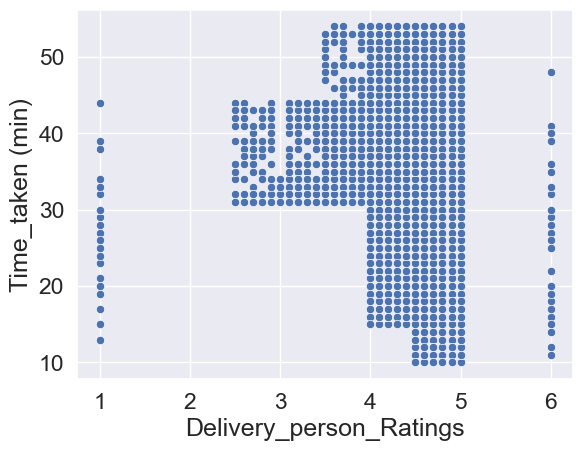

In [49]:
sns.scatterplot(data = df, x = df['Delivery_person_Ratings'], y = 'Time_taken (min)' )

<Axes: xlabel='distance', ylabel='Time_taken (min)'>

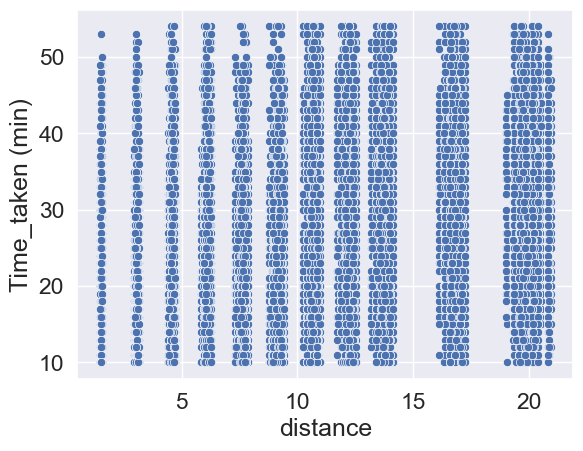

In [50]:
sns.scatterplot(data = df, x = df['distance'], y = 'Time_taken (min)' )

<Axes: >

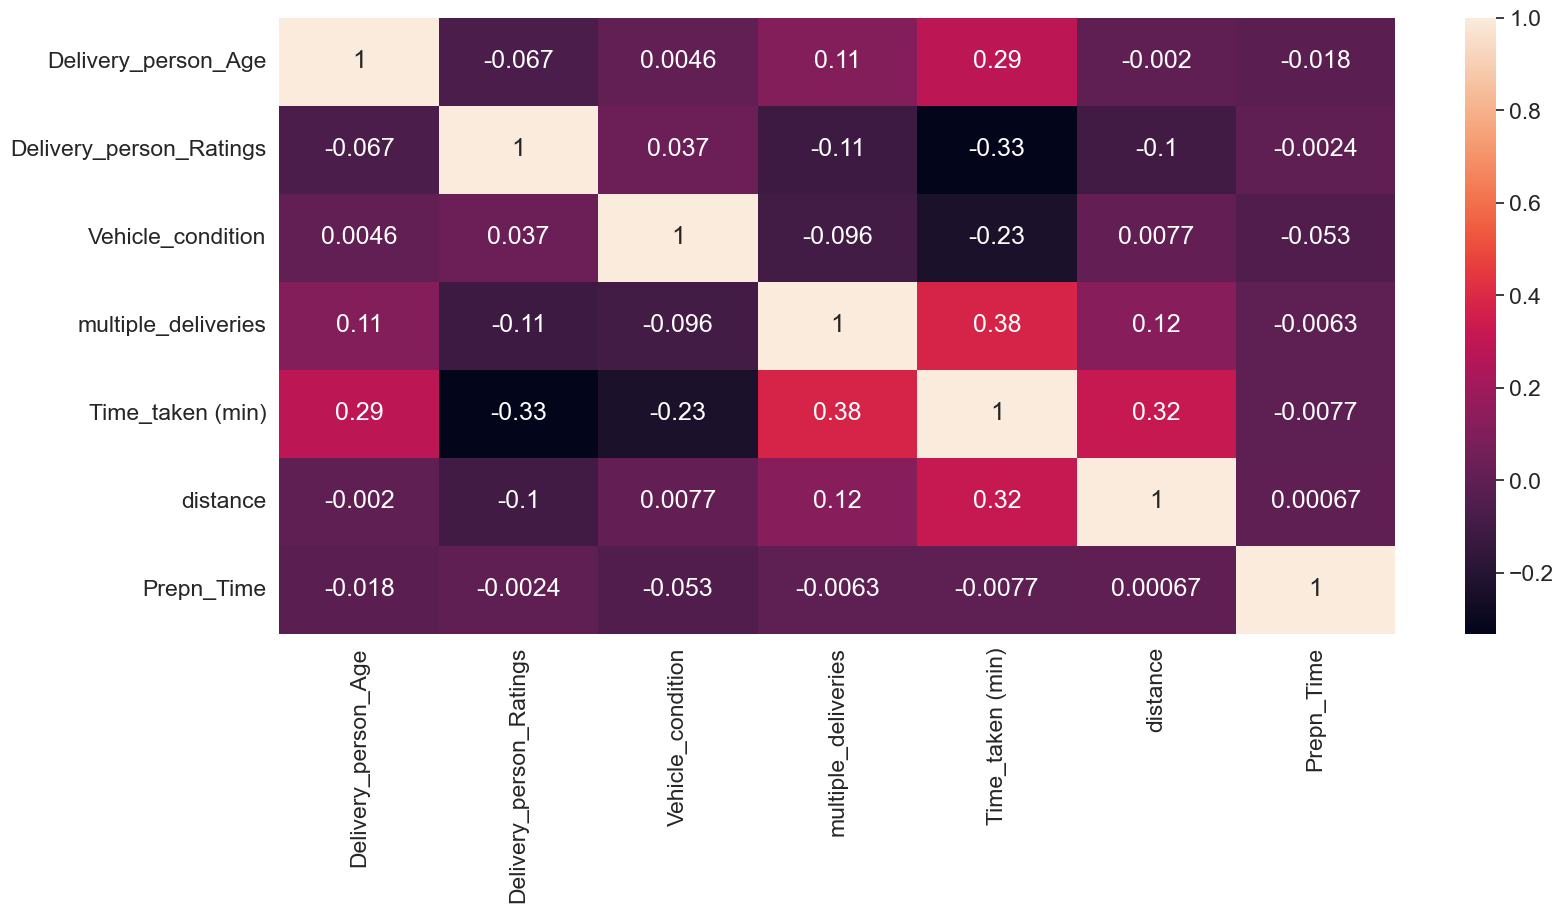

In [51]:
## correlation
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [52]:
# df['Festival'] = df['Festival'].map({'Yes': 1, 'No': 0})

In [53]:
# df=df.drop(labels=['Type_of_order', 'Type_of_vehicle'],axis=1)


In [54]:
df.to_csv("data/clean_data.csv", index=False)

In [55]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Prepn_Time
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,15
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,10
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,10
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,10
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,15


In [56]:
df.shape

(45584, 13)

In [4]:
## Data Ingestions step
df1=pd.read_csv("data/clean_data.csv")

In [5]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,Prepn_Time
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.271464,15
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.229376,10
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.764306,10
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.927795,10
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.373484,15


In [6]:
df1.shape

(45584, 13)

In [7]:
df1.dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Weather_conditions          object
Road_traffic_density        object
Vehicle_condition            int64
Type_of_order               object
Type_of_vehicle             object
multiple_deliveries        float64
Festival                    object
City                        object
Time_taken (min)             int64
distance                   float64
Prepn_Time                   int64
dtype: object